<a href="https://colab.research.google.com/github/SreeBhagya-S/nlu/blob/master/Sree_S_Bhagya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 1. Folders with photos of two personalities
# 2. Save the files as folders in ur google Drive.
# 3. Mount them in Colab




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [3]:
import os

In [4]:
root_dir='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset'

In [5]:
import shutil
from shutil import copyfile,rmtree

In [6]:
shutil.rmtree('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training')
shutil.rmtree('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/testing')

In [7]:
chitra_dir=os.path.join('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/chitra/')
len(os.listdir(chitra_dir))

100

In [8]:
my_dir = chitra_dir
for fname in os.listdir(my_dir):
    if fname.startswith("aug_"):
        os.remove(os.path.join(my_dir, fname))

In [9]:
len(os.listdir(chitra_dir))

20

In [10]:
shreya_dir=os.path.join('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/shreya/')
len(os.listdir(shreya_dir))

111

In [11]:
my_dir = shreya_dir
for fname in os.listdir(my_dir):
    if fname.startswith("aug_"):
        os.remove(os.path.join(my_dir, fname))

In [12]:
len(os.listdir(shreya_dir))

20

In [13]:
chitra_fnames = os.listdir( chitra_dir )
shreya_fnames = os.listdir( shreya_dir )

In [14]:
chitra_fnames

['13.jpg',
 '19.jpg',
 '10.jpg',
 '5.jpg',
 '17.jpg',
 '2.jpg',
 '12.jpg',
 '1.jpg',
 '9.jpg',
 '18.jpg',
 '20.jpg',
 '16.jpg',
 '6.jpg',
 '14.jpg',
 '11.jpg',
 '4.jpg',
 '8.jpg',
 '3.jpg',
 '7.jpg',
 '15.jpg']

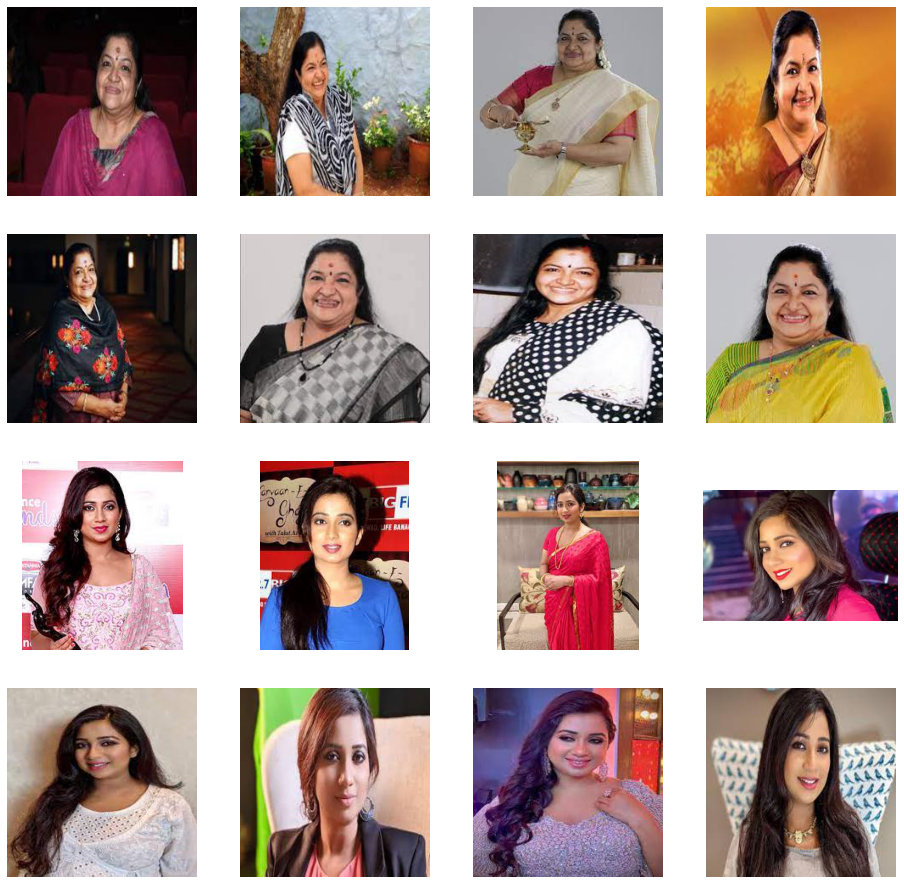

In [15]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_1_pix = [os.path.join(chitra_dir, fname) 
                for fname in chitra_fnames[ pic_index-8:pic_index] 
               ]

next_2_pix = [os.path.join(shreya_dir, fname) 
                for fname in shreya_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_1_pix+next_2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))


# **4. Data augmentation **

In [17]:
import numpy as np
import os
from PIL import Image
image_directory = chitra_dir
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)

for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory+'/' + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= chitra_dir,
                          save_prefix='aug',
                          save_format='jpg'):    
    i += 1    
    if i > 7:        
        break



In [18]:
len(os.listdir(chitra_dir))

100

In [19]:
image_directory = shreya_dir
my_images = os.listdir(image_directory)
dataset = []
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory+'/' + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= shreya_dir,
                          save_prefix='aug',
                          save_format='jpg'):    
    i += 1    
    if i > 8:        
        break

In [20]:
len(os.listdir(shreya_dir))

112

In [21]:
classes = ['chitra', 'shreya']

In [22]:
allFileNames = os.listdir(chitra_dir)
#allFileNames

In [23]:
training_dir_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training/'
testing_dir_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/testing/'
validation_dir_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/validation/'
TRAINING_DIR='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training/'
TESTING_DIR='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/testing/'
training_chitra_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training/chitra'
testing_chitra_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/testing/chitra'
training_shreya_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training/shreya'
testing_shreya_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/testing/shreya'
validation_chitra_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/validation/chitra'
validation_shreya_path='/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/validation/shreya'

In [ ]:
# for train_dir_path in training_dir_path:
#     try:
#         os.mkdir(train_dir_path)
#         os.mkdir(train_dir_path+chitra)
#         os.mkdir(train_dir_path+shreya)
#     except OSError:
#         pass

In [ ]:
# for test_dir_path in testing_dir_path:
#     try:
#         os.mkdir(test_dir_path)
#     except OSError:

#         pass

In [27]:
try:
    os.mkdir('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training')
    os.mkdir('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/testing')
    os.mkdir('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training/chitra')
    os.mkdir('/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset/training/shreya')   
except OSError:
    pass

In [28]:
import random
import glob
import cv2
import numpy as np
from os import path
from PIL import Image
import csv

In [29]:
import pandas as pd
train_df = pd.DataFrame(columns=['filename','class'])
train_df
test_df = pd.DataFrame(columns=['filename','class'])
test_df
df=pd.DataFrame(columns=['filename','class'])

In [30]:
from PIL import Image

# **5. Train-Test Split
# Use 80% for train and rest for test.**

In [31]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  
  for filename in os.listdir(SOURCE):
       file = SOURCE + filename
       if os.path.getsize(file) > 0:
           files.append(filename)
       else:
           print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  print(len(training_set))
  testing_set = shuffled_set[-testing_length:]
  print(len(testing_set)) 

  try: 
    i=0   
    for filename in training_set:
      if(SOURCE==chitra_dir):
        train_cls='chitra'
      else:
        train_cls='shreya'
      #print(filename)
      this_file = SOURCE + filename
      filename=train_cls+'_'+filename
      if(train_cls=='chitra'):
        destination = training_chitra_path +'/'+ filename
      else:
        destination = training_shreya_path +'/'+ filename
      copyfile(this_file, destination)
      train_df.loc[i] = [destination,train_cls]
      df.loc[i] = [destination,train_cls]
      i+=1
      j=i
      
  except OSError:
   pass


  # df2 = pd.DataFrame({'filename':[filename],'class':[train_cls]})
  # train_df=pd.concat([train_df, df2], ignore_index = True, axis = 0)
  
  print("Training set copied")
  try:
    i=0
    for filename in testing_set:
      print(filename)
      if(SOURCE==chitra_dir):
        test_cls='chitra'
      else:
        test_cls='shreya'
      #print(filename)
      this_file = SOURCE + filename
      filename=test_cls+'_'+filename
      destination = TESTING+filename
      copyfile(this_file, destination)
      test_df.loc[i] = [destination,test_cls]
      df.loc[j] = [destination,train_cls]
      i+=1
      j+=1
      
      # df2 = pd.DataFrame({'filename':[filename],'class':[test_cls]})
      # train_df=pd.concat([train_df, df2], ignore_index = True, axis = 0)
    
  except OSError:
   pass
  print("Testing set copied")
    
  
split_size = .8
split_data(chitra_dir, TRAINING_DIR, TESTING_DIR, split_size)
split_data(shreya_dir, TRAINING_DIR, TESTING_DIR, split_size)

80
20
Training set copied
aug_16_1378.jpg
aug_12_3173.jpg
aug_6_5974.jpg
aug_4_9564.jpg
6.jpg
aug_11_6798.jpg
aug_18_1417.jpg
aug_19_6683.jpg
aug_16_7213.jpg
aug_18_8790.jpg
aug_17_8062.jpg
aug_2_2127.jpg
aug_0_9538.jpg
aug_12_1089.jpg
aug_16_4065.jpg
aug_3_3935.jpg
1.jpg
aug_19_3865.jpg
3.jpg
aug_11_5374.jpg
Testing set copied
89
23
Training set copied
aug_3_4506.jpg
aug_16_6725.jpg
aug_1_4545.jpg
aug_2_7301.jpg
aug_10_1089.jpg
aug_13_8209.jpg
aug_4_3861.jpg
19.jpg
aug_6_1700.jpg
aug_15_8439.jpg
aug_1_3290.jpg
aug_9_1575.jpg
6.jpg
aug_4_5657.jpg
aug_10_3942.jpg
aug_3_8624.jpg
1.jpg
aug_8_8777.jpg
aug_9_7681.jpg
15.jpg
aug_11_4661.jpg
aug_3_4808.jpg
aug_11_895.jpg
Testing set copied


In [32]:
PATH = '/content/drive/MyDrive/Syllabus_CourseStudyMaterials/DL/Assignment3/Dataset'

train_dir = os.path.join(PATH, 'training')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'testing')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [33]:
# create test subdirectory
test_subdir = os.path.join(test_dir, 'chitra_and_shreya')

if not os.path.exists(test_subdir):
  os.mkdir(test_subdir)

# move test images into test subdirectory so that the flow_from_directory method can find them
for filename in os.listdir(test_dir):
  if not '.' in filename:
    continue
  old_path_name = os.path.join(test_dir, filename)
  new_path_name = os.path.join(test_subdir, filename)
  if not os.path.exists(new_path_name):
    os.rename(old_path_name, new_path_name)

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size)
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size)
test_data_gen = test_image_generator.flow_from_directory(test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary', batch_size=batch_size, shuffle=False)

Found 169 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 43 images belonging to 1 classes.


In [34]:
train_image_generator = ImageDataGenerator(rescale=1./255)


In [35]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 169 images belonging to 2 classes.


# ** 6.1. Design CNN model**

In [36]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [37]:
model = Sequential([
  Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  MaxPooling2D(2, 2),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dropout(0.5),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')
])



In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [40]:
history = model.fit(x=train_data_gen,epochs=epochs, validation_data=val_data_gen, verbose=2)

Epoch 1/10
2/2 - 38s - loss: 0.7306 - accuracy: 0.5207 - val_loss: 0.9040 - val_accuracy: 0.5000 - 38s/epoch - 19s/step
Epoch 2/10
2/2 - 1s - loss: 0.8386 - accuracy: 0.5266 - val_loss: 0.6930 - val_accuracy: 0.5000 - 837ms/epoch - 419ms/step
Epoch 3/10
2/2 - 1s - loss: 0.6775 - accuracy: 0.5680 - val_loss: 0.6797 - val_accuracy: 0.6500 - 885ms/epoch - 443ms/step
Epoch 4/10
2/2 - 1s - loss: 0.6740 - accuracy: 0.6568 - val_loss: 0.6637 - val_accuracy: 0.6100 - 824ms/epoch - 412ms/step
Epoch 5/10
2/2 - 1s - loss: 0.6534 - accuracy: 0.6331 - val_loss: 0.6463 - val_accuracy: 0.6500 - 878ms/epoch - 439ms/step
Epoch 6/10
2/2 - 1s - loss: 0.6195 - accuracy: 0.7278 - val_loss: 0.6108 - val_accuracy: 0.5700 - 807ms/epoch - 404ms/step
Epoch 7/10
2/2 - 1s - loss: 0.5705 - accuracy: 0.7219 - val_loss: 0.7093 - val_accuracy: 0.6200 - 816ms/epoch - 408ms/step
Epoch 8/10
2/2 - 1s - loss: 0.5324 - accuracy: 0.7633 - val_loss: 0.8351 - val_accuracy: 0.5000 - 886ms/epoch - 443ms/step
Epoch 9/10
2/2 - 1s

# ***6.2. Plot Training acc, Training loss, validation acc, validation loss***

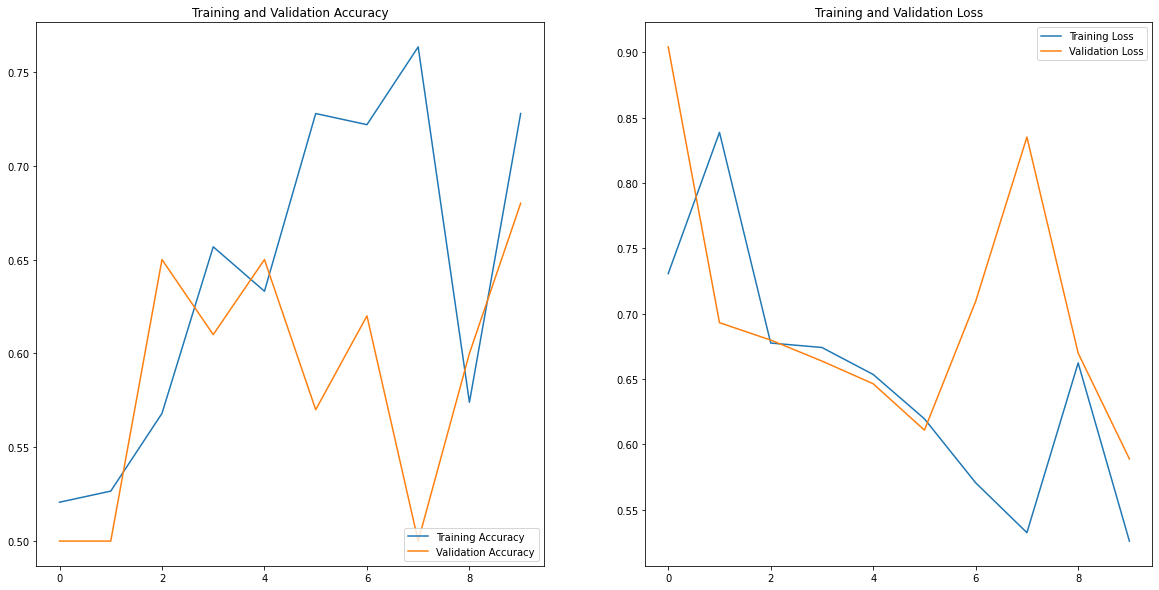

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**7. From graph it can be state that there is no overfitting in the  model**

# **8. Predict class of an image**

In [42]:
array_probabilities = model.predict(test_data_gen)
probabilities = [i[0] for i in array_probabilities]

In [43]:
def plotImage(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
          axes.imshow(img)
          axes.axis('off')
    else:
          axes.imshow(img)
          axes.axis('off')
          if probabilities > 0.5:
              axes.set_title("%.2f" % (probabilities*100) + "% shreya")
          else:
              axes.set_title("%.2f" % ((1-probabilities)*100) + "% chitra")
    plt.show()

In [44]:
x=model.predict(test_data_gen)[25]
y=x[0]
if y > 0.5:
              print(" shreya")
              print("prob=",y*100)
else:
              print("chitra",((1-y)*100))


 shreya
prob= 53.23789119720459


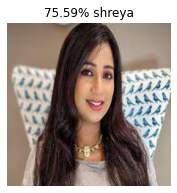

In [64]:
plotImage(x, probabilities=y)

## **`9. Changing Optimizer to SGD`**

In [48]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(x=train_data_gen,epochs=epochs, validation_data=val_data_gen, verbose=2)

Epoch 1/10
2/2 - 2s - loss: 0.4698 - accuracy: 0.8225 - val_loss: 0.5609 - val_accuracy: 0.6400 - 2s/epoch - 914ms/step
Epoch 2/10
2/2 - 1s - loss: 0.4906 - accuracy: 0.7929 - val_loss: 0.7269 - val_accuracy: 0.5500 - 871ms/epoch - 435ms/step
Epoch 3/10
2/2 - 1s - loss: 0.6246 - accuracy: 0.5858 - val_loss: 0.6328 - val_accuracy: 0.6400 - 819ms/epoch - 409ms/step
Epoch 4/10
2/2 - 1s - loss: 0.5056 - accuracy: 0.7396 - val_loss: 0.6022 - val_accuracy: 0.6700 - 887ms/epoch - 443ms/step
Epoch 5/10
2/2 - 1s - loss: 0.4935 - accuracy: 0.7633 - val_loss: 0.5807 - val_accuracy: 0.6600 - 824ms/epoch - 412ms/step
Epoch 6/10
2/2 - 1s - loss: 0.4434 - accuracy: 0.7929 - val_loss: 0.5772 - val_accuracy: 0.6900 - 865ms/epoch - 433ms/step
Epoch 7/10
2/2 - 1s - loss: 0.4380 - accuracy: 0.8284 - val_loss: 0.5955 - val_accuracy: 0.6600 - 808ms/epoch - 404ms/step
Epoch 8/10
2/2 - 1s - loss: 0.4409 - accuracy: 0.7988 - val_loss: 0.5868 - val_accuracy: 0.6700 - 840ms/epoch - 420ms/step
Epoch 9/10
2/2 - 1s

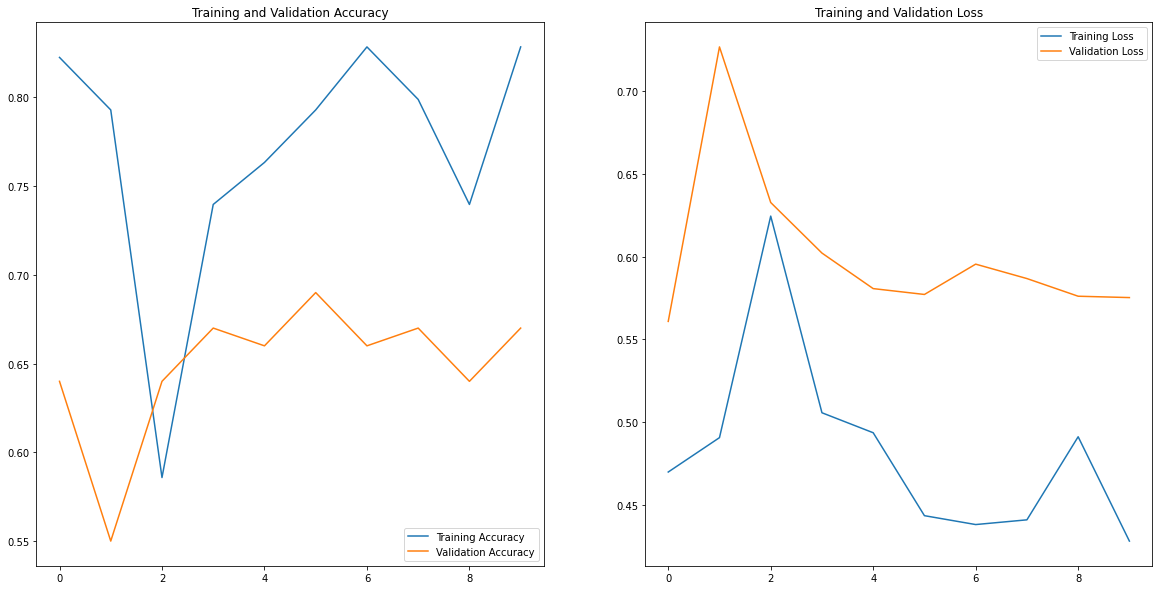

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
array_probabilities = model.predict(test_data_gen)
probabilities = [i[0] for i in array_probabilities]

In [52]:
x=model.predict(test_data_gen)[25]
y=x[0]
if y > 0.5:
              print(" shreya")
              print("prob=",y*100)
else:
              print("chitra",((1-y)*100))


 shreya
prob= 52.495694160461426


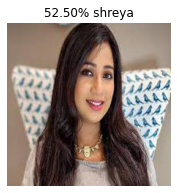

In [53]:
plotImage(x, probabilities=y)